In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [2]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi-SP_2019'
combined_df_2019 = combine_csv_files(folder_path_2019)


folder_path_2020 = 'C://Users//Facu//Downloads//EE_malawi-SP_2020'
combined_df_2020 = combine_csv_files(folder_path_2020)


folder_path_2021 = 'C://Users//Facu//Downloads//EE_malawi-SP_2021'
combined_df_2021 = combine_csv_files(folder_path_2021)

combined_df = pd.concat([combined_df_2019, combined_df_2020, combined_df_2021], ignore_index=True)


In [6]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi-SP_2019'
# combined_df = combine_csv_files(folder_path_2019)

In [3]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34772 entries, 0 to 34771
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  34772 non-null  int64  
 1   B11           34772 non-null  float64
 2   B12           34772 non-null  float64
 3   B2            34772 non-null  float64
 4   B3            34772 non-null  float64
 5   B4            34772 non-null  float64
 6   B8            34772 non-null  float64
 7   CH            34772 non-null  float64
 8   EVI           34772 non-null  float64
 9   HH            34772 non-null  float64
 10  HH_HV_div_2   34772 non-null  float64
 11  HH_div_HV     34772 non-null  float64
 12  HH_minus_HV   34772 non-null  float64
 13  HH_plus_HV    34772 non-null  float64
 14  HV            34772 non-null  float64
 15  MNDWI         34772 non-null  float64
 16  NDBI          34772 non-null  float64
 17  NDVI          34772 non-null  float64
 18  RVI           34772 non-nu

In [4]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]

# Mostrar las primeras filas del DataFrame filtrado para verificar
df_filtered.describe()

,system:index,B11,B12,B2,B3,B4,B8,CH,EVI,HH,...,VV_div_VH,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,label,slope,agbd_se_1,threshold
count,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,...,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,4418.000000,16151.000000
mean,361.150765,2530.089014,1825.924939,486.515524,709.812125,856.041322,2236.758518,6.423565,1.033858,4438.814934,...,0.611533,6.518415,-27.422935,59.062907,4.933554,923.551916,3.554764,12.293659,5.729736,18.172896
std,326.416245,523.288364,587.723091,131.330775,154.567528,299.897407,434.114114,7.859239,1.868951,1383.812026,...,0.062890,0.689820,3.526912,77.579741,4.590356,402.236291,1.950205,12.281570,5.582735,13.383410
min,0.000000,572.000000,276.000000,71.500000,102.000000,88.000000,503.500000,0.000000,-153.974370,849.000000,...,-0.482797,3.180486,-47.148050,6.005444,2.981795,474.000000,1.000000,0.000000,2.981795,0.491117
25%,111.000000,2213.000000,1413.166700,406.000000,625.000000,658.000000,1964.250000,0.000000,0.592568,3430.000000,...,0.588064,6.068203,-29.103307,11.980653,2.983939,587.000000,1.000000,2.669407,2.983440,6.987027
50%,259.000000,2566.000000,1883.500000,486.500000,706.500000,882.000000,2181.500000,3.000000,0.831551,4208.000000,...,0.616782,6.395471,-27.319778,25.709936,2.989102,780.000000,5.000000,6.828672,2.987670,14.792272
75%,518.000000,2891.500000,2229.000000,564.000000,793.000000,1056.000000,2432.000000,11.000000,1.312032,5215.000000,...,0.646236,6.830560,-25.650334,73.600600,4.173415,1197.000000,5.000000,19.622484,3.025380,27.173584
max,1560.000000,4905.000000,4104.000000,1286.500000,1748.000000,2129.000000,5453.000000,34.000000,23.893805,14390.000000,...,0.873611,11.055733,-3.603953,873.749760,17.173664,2061.000000,7.000000,68.069534,17.173664,49.811787


In [5]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove

,system:index,B11,B12,B2,B3,B4,B8,CH,EVI,HH,...,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,label,slope,.geo,agbd_se_1,threshold
3,3,2049.0,1429.0,546.0,795.0,856.0,2309.0,9.0,1.084005,4766.0,...,6.524582,-27.279684,16.890486,2.982532,626.0,4.0,2.134969,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,17.658059
4,4,1998.0,1426.0,523.0,735.0,840.0,1891.0,9.0,0.873069,4766.0,...,6.522845,-27.348764,16.890486,2.982532,626.0,4.5,2.134969,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,17.658059
5,5,2940.0,2024.0,576.5,810.5,999.0,2588.5,4.0,0.932860,4355.0,...,6.456994,-27.270730,7.822563,2.988732,624.0,5.0,4.171833,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,38.206557
6,6,2961.0,2117.0,515.0,731.0,938.0,2436.0,3.0,0.891136,4840.0,...,6.468358,-26.660845,7.822563,2.988732,626.0,5.0,5.445742,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,38.206557
14,14,2937.0,1908.0,578.0,826.0,1304.0,2433.0,1.0,0.476532,4610.0,...,6.536305,-23.244740,10.279377,2.986123,653.0,5.0,21.619677,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,29.049650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34762,1556,2852.0,2334.0,441.0,641.5,862.5,2464.0,0.0,0.924120,2595.0,...,6.714742,-26.711473,17.415726,2.982392,626.0,5.0,4.688950,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,17.124707
34763,1557,3090.5,2515.0,463.0,672.0,958.5,2280.5,0.0,0.724781,2595.0,...,6.785928,-26.894688,17.415726,2.982392,627.0,5.0,3.826842,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,17.124707
34764,1558,2977.5,2223.0,514.5,719.5,938.5,2481.0,4.0,0.906447,2656.0,...,7.528927,-26.024406,8.743260,2.987639,624.0,5.0,0.961443,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,34.170767
34765,1559,3112.5,2348.5,467.5,711.5,903.5,2467.5,3.0,0.892032,2715.0,...,7.517193,-26.027346,8.743260,2.987639,624.0,5.0,0.961443,"{""geodesic"":false,""type"":""Point"",""coordinates""...",NaN,34.170767


In [6]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
# df_nuevo = df_filtered_remove[df_filtered_remove['slope'] <= 30]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15784 entries, 3 to 34766
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  15784 non-null  int64  
 1   B11           15784 non-null  float64
 2   B12           15784 non-null  float64
 3   B2            15784 non-null  float64
 4   B3            15784 non-null  float64
 5   B4            15784 non-null  float64
 6   B8            15784 non-null  float64
 7   CH            15784 non-null  float64
 8   EVI           15784 non-null  float64
 9   HH            15784 non-null  float64
 10  HH_HV_div_2   15784 non-null  float64
 11  HH_div_HV     15784 non-null  float64
 12  HH_minus_HV   15784 non-null  float64
 13  HH_plus_HV    15784 non-null  float64
 14  HV            15784 non-null  float64
 15  MNDWI         15784 non-null  float64
 16  NDBI          15784 non-null  float64
 17  NDVI          15784 non-null  float64
 18  RVI           15784 non-null  f

In [14]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['threshold', 'agbd_se','label','agbd_se_1','.geo','system:index']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15784 entries, 3 to 34766
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B11          15784 non-null  float64
 1   B12          15784 non-null  float64
 2   B2           15784 non-null  float64
 3   B3           15784 non-null  float64
 4   B4           15784 non-null  float64
 5   B8           15784 non-null  float64
 6   CH           15784 non-null  float64
 7   EVI          15784 non-null  float64
 8   HH           15784 non-null  float64
 9   HH_HV_div_2  15784 non-null  float64
 10  HH_div_HV    15784 non-null  float64
 11  HH_minus_HV  15784 non-null  float64
 12  HH_plus_HV   15784 non-null  float64
 13  HV           15784 non-null  float64
 14  MNDWI        15784 non-null  float64
 15  NDBI         15784 non-null  float64
 16  NDVI         15784 non-null  float64
 17  RVI          15784 non-null  float64
 18  RVI_palsar   15784 non-null  float64
 19  SAVI     

In [15]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['agbd','.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'RVI_palsar', 'SAVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


In [24]:
feature_names =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'RVI_palsar', 'SAVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']
feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
feature_names_s2_s1 =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


df_s2_palsar = df_modified[feature_names_s2_palsar]
df_s2_s1 = df_modified[feature_names_s2_s1]

In [25]:
# Separar la variable objetivo 'agbd'
y = df_s2_palsar['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_s2_palsar.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15784 entries, 3 to 34766
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B11          15784 non-null  float64
 1   B12          15784 non-null  float64
 2   B2           15784 non-null  float64
 3   B3           15784 non-null  float64
 4   B4           15784 non-null  float64
 5   B8           15784 non-null  float64
 6   CH           15784 non-null  float64
 7   EVI          15784 non-null  float64
 8   HH           15784 non-null  float64
 9   HH_HV_div_2  15784 non-null  float64
 10  HH_div_HV    15784 non-null  float64
 11  HH_minus_HV  15784 non-null  float64
 12  HH_plus_HV   15784 non-null  float64
 13  HV           15784 non-null  float64
 14  MNDWI        15784 non-null  float64
 15  NDBI         15784 non-null  float64
 16  NDVI         15784 non-null  float64
 17  RVI_palsar   15784 non-null  float64
 18  SAVI         15784 non-null  float64
 19  elevation

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\Facu\anaconda3\envs\Geo\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error: 19.25897104520804
R^2 Score: 0.8086893860025282


In [31]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 24.337471519061026
R^2 Score: 0.8395859883511111


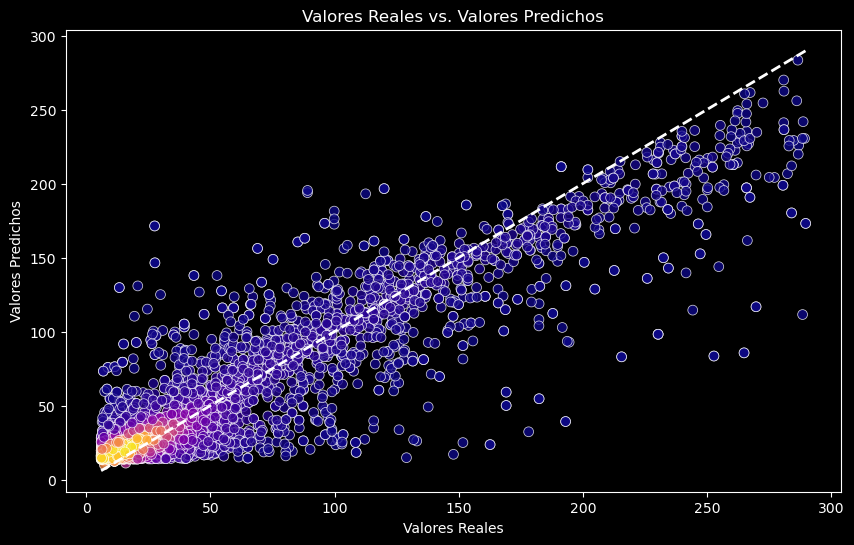

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

        Feature  Importance
6            CH    0.418678
20        slope    0.156115
13           HV    0.069689
19    elevation    0.045126
5            B8    0.036947
14        MNDWI    0.028337
15         NDBI    0.024205
0           B11    0.021582
11  HH_minus_HV    0.020417
2            B2    0.020410
7           EVI    0.019839
3            B3    0.018099
1           B12    0.016245
8            HH    0.015984
17   RVI_palsar    0.015176
4            B4    0.015043
10    HH_div_HV    0.014743
9   HH_HV_div_2    0.013663
12   HH_plus_HV    0.011503
18         SAVI    0.009148
16         NDVI    0.009051


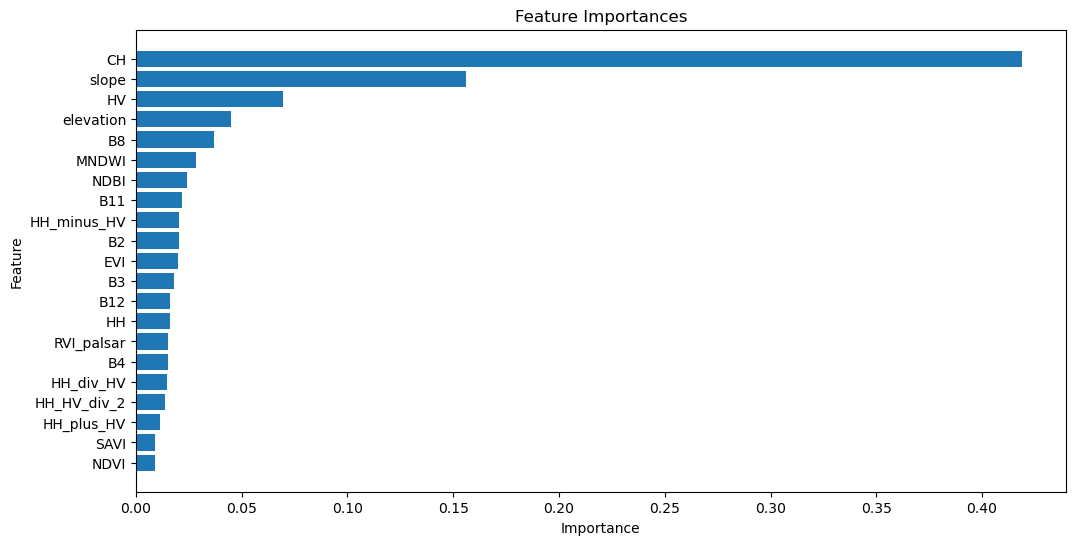

In [32]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [33]:
# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [34]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_Malawi"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [21]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=10):
    trees = ml.rf_to_strings(model, feature_names, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malawi_complete"
export_model_in_parts(rf, feature_names, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malawi_complete_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')